UPSAMPLING

DOWNSAMPLING

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
np.random.seed(123)

In [10]:
#Create a dataframe with two classes
n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-class_0

In [11]:
n_class_0

900

In [12]:
n_class_1

100

In [13]:
#Create a dataframe with imbalanced dataset
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

In [14]:
class_0.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


<Axes: xlabel='feature1', ylabel='Count'>

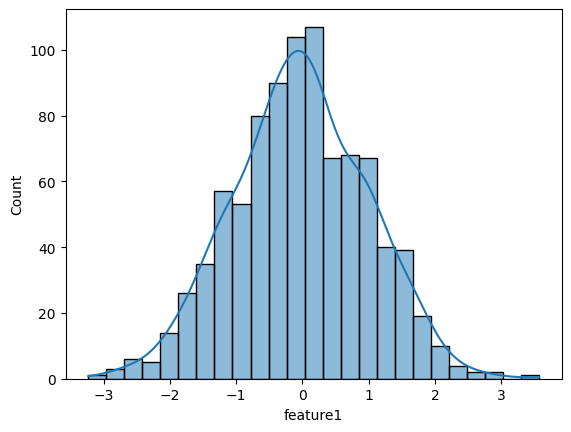

In [17]:
sns.histplot(class_0['feature1'],kde=True)

<Axes: xlabel='feature2', ylabel='Count'>

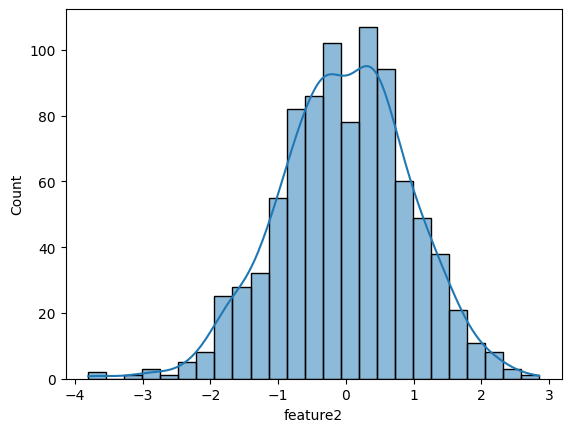

In [18]:
sns.histplot(class_0['feature2'],kde=True)

In [46]:
class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [21]:
class_1['feature1']

0     1.699768
1     1.367739
2     1.795683
3     2.213696
4     3.033878
        ...   
95    1.376371
96    2.239810
97    1.131760
98    2.902006
99    2.697490
Name: feature1, Length: 100, dtype: float64

In [22]:
class_1.head()

,feature1,feature2,target
0,1.699768,2.139033,0
1,1.367739,2.025577,0
2,1.795683,1.803557,0
3,2.213696,3.312255,0
4,3.033878,3.187417,0


<Axes: xlabel='feature1', ylabel='Count'>

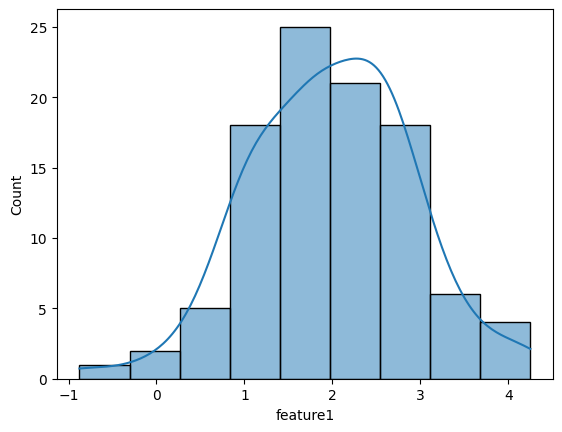

In [47]:
sns.histplot(class_1['feature1'],kde=True)

In [30]:
'''class_check=pd.DataFrame({
    'feature1':np.random.normal(loc=10,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})
'''

"class_check=pd.DataFrame({\n    'feature1':np.random.normal(loc=10,scale=1,size=n_class_0),\n    'feature2':np.random.normal(loc=2,scale=1,size=n_class_0),\n    'target':[0]*n_class_0\n})\n"

In [29]:
#sns.histplot(class_check['feature1'],kde=True)

In [48]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [49]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [50]:
df.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [51]:
df.tail()

,feature1,feature2,target
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1
999,2.838910,2.240773,1


In [52]:
#Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [53]:
df_minority

,feature1,feature2,target
900,1.775921,0.902553,1
901,2.338840,1.058241,1
902,1.728472,3.670939,1
903,3.365531,2.067791,1
904,1.262626,3.630785,1
...,...,...,...
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1


In [54]:
df_majority

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [55]:
df_minority.shape

(100, 3)

In [56]:
df_majority.shape

(900, 3)

In [57]:
from sklearn.utils import resample

In [58]:
df_minority_upsampled=resample(df_minority,
                               replace=True,
                               n_samples=len(df_majority),
                               random_state=33)


In [59]:
df_minority_upsampled.shape

(900, 3)

In [60]:
df_minority_upsampled.head()

,feature1,feature2,target
920,1.426968,0.173744,1
907,1.236936,0.925178,1
988,2.784438,1.392774,1
966,3.162265,1.946024,1
918,1.952119,2.518581,1


In [61]:
df_minority.head()

,feature1,feature2,target
900,1.775921,0.902553,1
901,2.338840,1.058241,1
902,1.728472,3.670939,1
903,3.365531,2.067791,1
904,1.262626,3.630785,1


In [64]:
df_minority.tail()

,feature1,feature2,target
995,2.720690,1.978489,1
996,1.949078,3.709793,1
997,2.709784,3.324917,1
998,1.817689,1.549237,1
999,2.838910,2.240773,1


In [67]:
df_minority['target']

900    1
901    1
902    1
903    1
904    1
      ..
995    1
996    1
997    1
998    1
999    1
Name: target, Length: 100, dtype: int64

In [71]:
df_minority.head(10)

,feature1,feature2,target
900,1.775921,0.902553,1
901,2.338840,1.058241,1
902,1.728472,3.670939,1
903,3.365531,2.067791,1
904,1.262626,3.630785,1
905,1.433185,3.383373,1
906,2.000737,2.284930,1
907,1.236936,0.925178,1
908,3.285175,2.661289,1
909,2.625334,1.345245,1


In [73]:
df_minority_upsampled.iloc[1]

feature1    1.236936
feature2    0.925178
target      1.000000
Name: 907, dtype: float64

In [76]:
df_minority.iloc[7]

feature1    1.236936
feature2    0.925178
target      1.000000
Name: 907, dtype: float64